# Explore here

In [1]:
# BASICS
import pandas as pd
import numpy as np

# VISUALIZACION
import matplotlib.pyplot as plt
import seaborn as sns

# SEPARACION DE DATOS
from sklearn.model_selection import train_test_split

# ESCALAMIENTO
from sklearn.preprocessing import MinMaxScaler

# SELECCION DE PARAMETROS
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# MODELOS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

# METRICAS
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
# data.to_csv("../data/raw/data.csv", index=False)
data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [4]:
# Tamaño de mis datos
data.shape

(3140, 108)

In [5]:
# Informacion general de mis datos
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [9]:
# Búsqueda de duplicados
display(data.duplicated().sum())
# No presenta datos duplicados

np.int64(0)

In [10]:
# Selección de atributos relevantes

# Eliminacion de columna "fips" representativa de codigo asignado a cada condado
data = data.drop("fips", axis=1)

In [12]:
# Agrupacion de rangos de edades mas amplia en valores porcentuales respecto al "TOT_POP"
data["0-19 %"] = (data["0-9"] + data["19-Oct"])*100/data["TOT_POP"]
data["20-49 %"] = (data["20-29"] + data["30-39"] + data["40-49"])*100/data["TOT_POP"]
data["50+ %"] = (data["50-59"] + data["60-69"] + data["70-79"] + data["80+"])*100/data["TOT_POP"]

# Columnas con rango de edades a eliminar
cols_to_drop = data.columns[1:19]
data = data.drop(columns=cols_to_drop)

In [13]:
# Columnas con datos etnicos a eliminar, mantengo los datos porcentuales
cols_to_drop = ["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", 
                "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"]
data = data.drop(columns=cols_to_drop)

In [14]:
# Analisis de igualdad entre columna "TOT_POP" y "POP_ESTIMATE_2018"
equals = data["TOT_POP"] ==  data["POP_ESTIMATE_2018"]
display(equals.value_counts()) # Las columnas son exactamente iguales en sus datos, se procede a eliminar "POP_ESTIMATE_2018"
data = data.drop("POP_ESTIMATE_2018", axis=1)

True    3140
Name: count, dtype: int64

In [15]:
# Eliminacion de datos de nivel academico, mantengo los datos porcentuales
cols_to_drop = ["Less than a high school diploma 2014-18", "High school diploma only 2014-18", 
                "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"]
data = data.drop(columns=cols_to_drop)

In [16]:
# Elimino rango de edades y mantengo los ya agrupados al inicio
cols_to_drop = ["Population Aged 60+", "Percent of Population Aged 60+"]
data = data.drop(columns=cols_to_drop)

In [17]:
# Eliminacion de datos de margen de error o incertidumbre y los datos totales en bruto, mantengo la prevalencia
cols_to_drop = ["anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "anycondition_number", 
                "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Obesity_number", 
                "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "Heart disease_number", 
                "COPD_Lower 95% CI", "COPD_Upper 95% CI", "COPD_number", 
                "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "diabetes_number", 
                "CKD_Lower 95% CI", "CKD_Upper 95% CI", "CKD_number"]
data = data.drop(columns=cols_to_drop)

In [18]:
# Eliminacion de datos que representan tasas porcentuales, grupos de edades diferentes a los agrupados y codigos de estado que no aportan
cols_to_drop = ["CI90LBINC_2018", "CI90UBINC_2018", "Unemployment_rate_2018", "STATE_FIPS", "county_pop2018_18 and older", 
                "Total Population", "COUNTY_NAME", "STATE_NAME", "CNTY_FIPS"]
data = data.drop(columns=cols_to_drop)

In [19]:
# Con la seleccion anterior de atributos relevantes reducimos el tamaño de nuestros datos en mas de la mitad
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 52 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        3140 non-null   int64  
 1   % White-alone                                                                  3140 non-null   float64
 2   % Black-alone                                                                  3140 non-null   float64
 3   % NA/AI-alone                                                                  3140 non-null   float64
 4   % Asian-alone                                                                  3140 non-null   float64
 5   % Hawaiian/PI-alone                                                            3140 non-null   float64
 6   % Two or more races     

In [20]:
# Defino "Heart disease_prevalence" como mi variable a predecir, es de tipo continua y no presenta valores nulos ni faltantes
# El dataset es susceptible de sufrir mas cambios o eliminaciones a medida que avance el analisis

In [21]:
# ANALISIS DE VARIABLES CATEGORICAS >> "Urban_rural_code"
data.Urban_rural_code.value_counts()

Urban_rural_code
6    1333
5     641
3     372
2     368
4     358
1      68
Name: count, dtype: int64

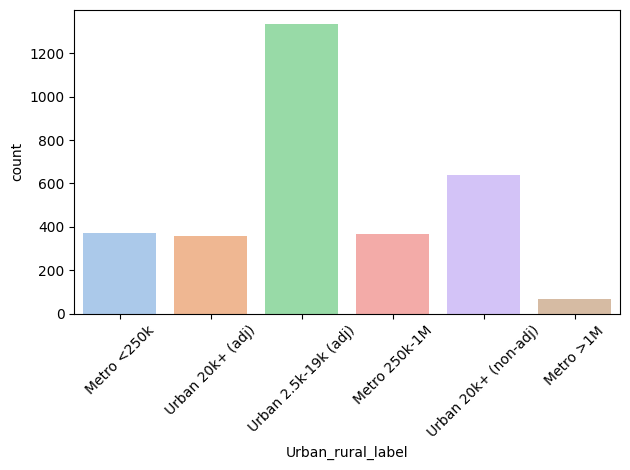

In [22]:
# Tipos de condados segun su poblacion para graficar
urban_rural_labels = {
    1: "Metro >1M",
    2: "Metro 250k-1M",
    3: "Metro <250k",
    4: "Urban 20k+ (adj)",
    5: "Urban 20k+ (non-adj)",
    6: "Urban 2.5k-19k (adj)",
    7: "Urban 2.5k-19k (non-adj)",
    8: "Rural <2.5k (adj)",
    9: "Rural <2.5k (non-adj)",
    88: "Unknown (AK/HI)",
    99: "Unknown (Other)"
}

data['Urban_rural_label'] = data['Urban_rural_code'].map(urban_rural_labels)

sns.countplot(data=data, x='Urban_rural_label', palette='pastel', hue='Urban_rural_label', legend=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Elimino la columna creada anteriormente que era solo para graficar los labels de los tipos de condados
data = data.drop('Urban_rural_label', axis=1)

Mayoría  de condados representativos de poblaciones urbanas adyacentes a zonas metropolitanas, con entre 2500 y 19000 habitantes, el resto de condados se mantiene entre 400 y 600 datos cada uno, siendo el menor las zonas metropolitanas de 1 millon de habitantes o mas.

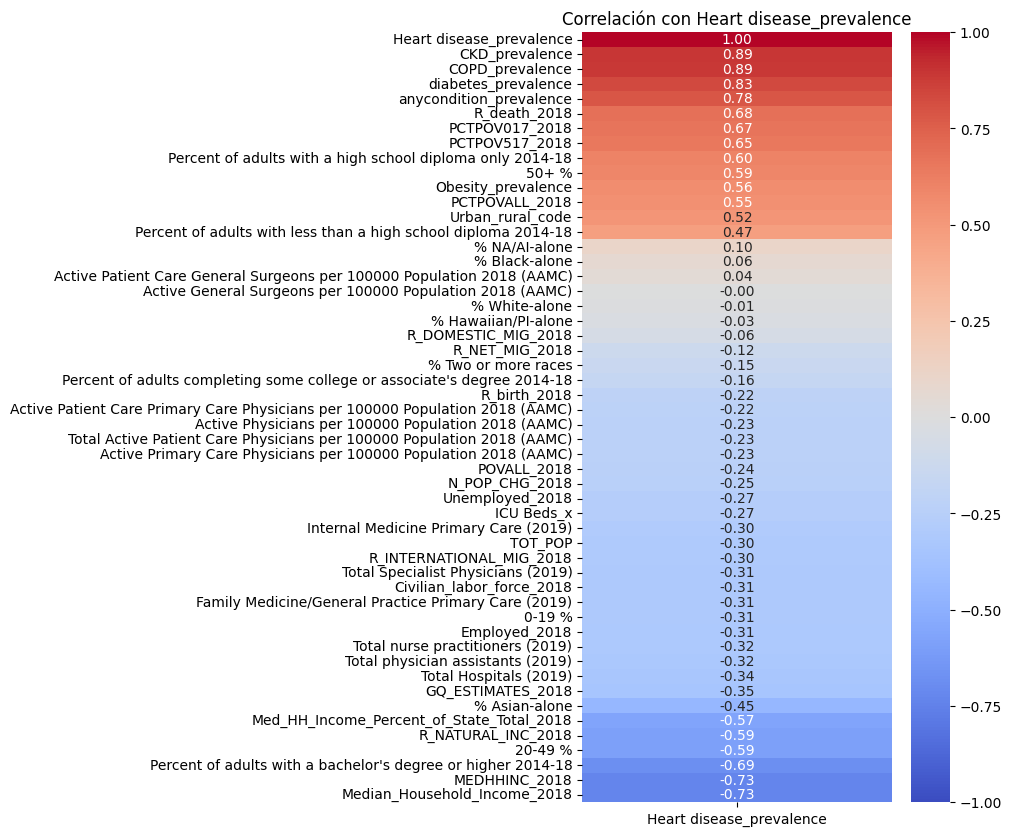

In [23]:
# Buscar correlaciones bajas (-0.3<x<0.3) con la variable objetivo "Heart disease_prevalence" para eliminar columnas innecesarias

# Calculo todas las correlaciones numéricas
correlaciones = data.corr(numeric_only=True)

# Extraer solo la fila/columna relacionada con mi variable objetivo
cor_target = correlaciones[['Heart disease_prevalence']].sort_values(by='Heart disease_prevalence', ascending=False)

# Heatmap de una sola columna
plt.figure(figsize=(5, 10))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con Heart disease_prevalence")
plt.show()

In [24]:
# Se decide eliminar entonces esta lista de columnas con baja correlacion con el target
cols_to_drop = ["ICU Beds_x", "Unemployed_2018", "N_POP_CHG_2018", "POVALL_2018", 
                "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", 
                "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", 
                "Active Physicians per 100000 Population 2018 (AAMC)", 
                "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)", "R_birth_2018", 
                "Percent of adults completing some college or associate's degree 2014-18", "% Two or more races", "R_NET_MIG_2018", 
                "R_DOMESTIC_MIG_2018", "% Hawaiian/PI-alone", "% White-alone", "Active General Surgeons per 100000 Population 2018 (AAMC)", 
                "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", "% Black-alone", "% NA/AI-alone"]
data = data.drop(columns=cols_to_drop)
data

,TOT_POP,% Asian-alone,GQ_ESTIMATES_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Urban_rural_code,0-19 %,20-49 %,50+ %
0,55601,1.224798,455,9.6,2.2,0.0,11.3,32.6,27.7,13.8,...,47.6,35.8,7.9,8.6,12.9,3.1,3,25.941979,38.756497,35.301523
1,218022,1.150343,2190,10.3,0.1,0.5,9.7,27.6,31.3,9.8,...,40.2,29.7,7.8,8.6,12.0,3.2,4,23.699443,34.918494,41.382062
2,24881,0.454162,2820,12.9,-2.5,0.5,27.0,35.7,12.2,30.9,...,57.5,40.7,11.0,12.1,19.7,4.5,6,22.876894,38.354568,38.768538
3,22400,0.236607,2151,11.4,-0.3,0.4,16.8,47.3,11.5,21.8,...,51.6,38.7,8.6,10.0,14.1,3.3,2,22.553571,40.982143,36.464286
4,57840,0.319848,489,11.4,0.3,0.1,19.8,34.0,12.6,13.2,...,46.3,34.0,9.2,10.5,13.5,3.4,2,25.354426,36.479945,38.165629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,1.010429,660,7.0,5.6,1.4,9.0,33.3,22.0,8.4,...,40.3,33.6,5.9,6.6,8.9,2.6,5,28.872732,40.115212,31.012055
3136,23081,1.412417,270,3.2,6.7,1.6,5.6,13.2,57.4,6.3,...,24.3,19.4,5.2,4.9,7.2,2.4,5,19.795503,45.418309,34.786188
3137,20299,0.472930,220,7.2,6.3,0.0,7.2,40.1,15.4,10.0,...,42.2,34.2,7.2,8.0,10.4,3.0,5,31.164097,35.691413,33.144490
3138,7885,0.824350,140,10.7,-1.4,-0.6,10.4,30.3,21.5,11.9,...,37.5,28.4,8.2,8.3,11.3,3.4,6,24.996829,31.934052,43.069119


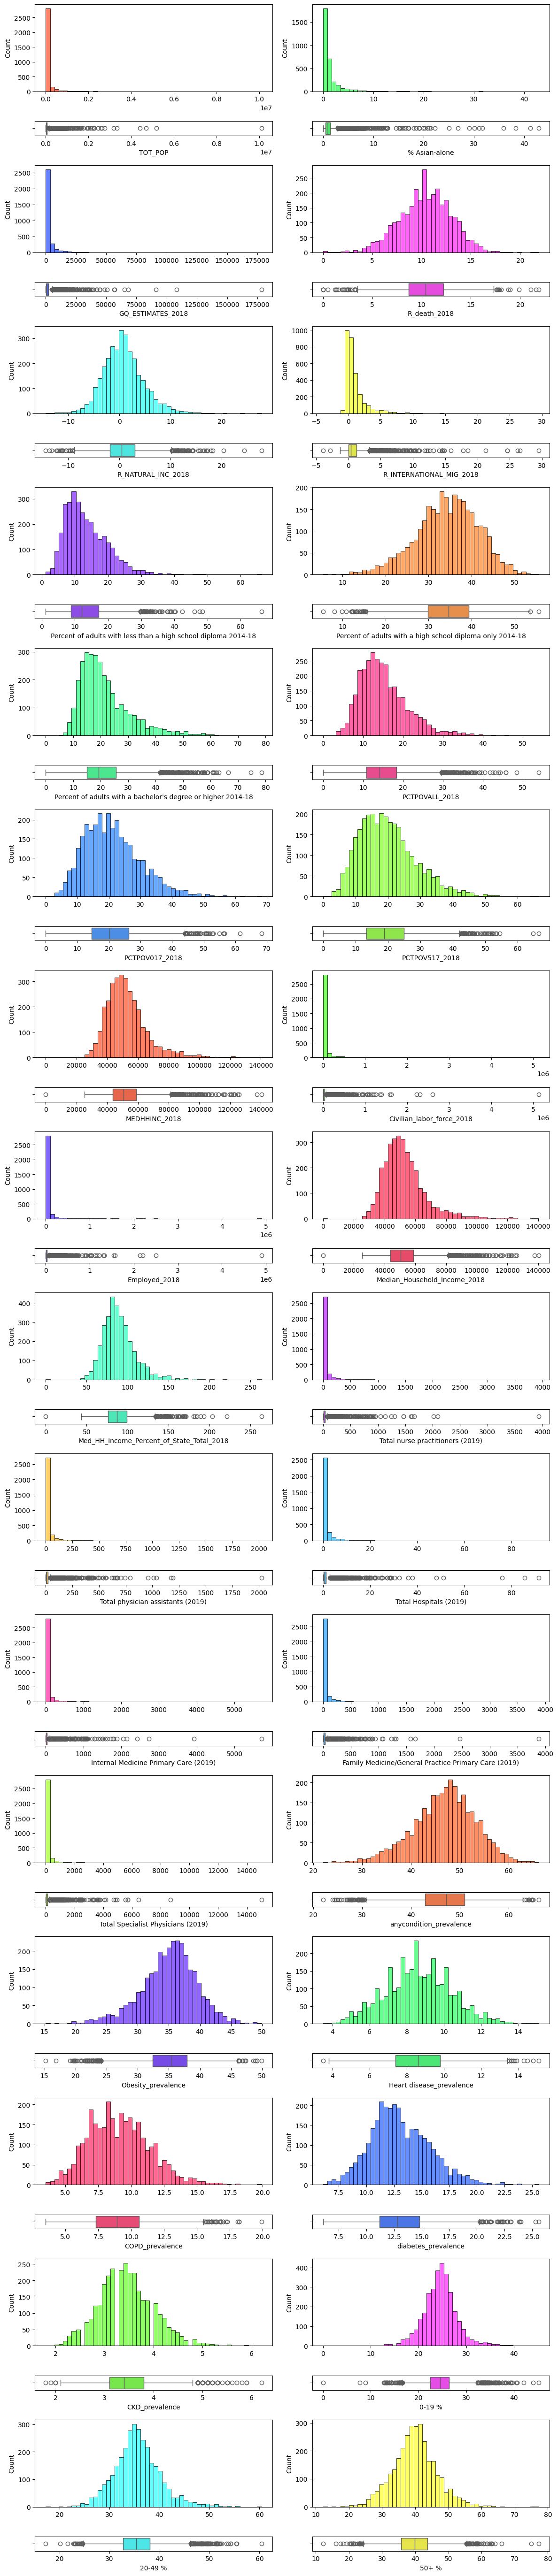

In [26]:
# ANALISIS DE VARIABLES NUMERICAS
# ["TOT_POP", "% Asian-alone", "GQ_ESTIMATES_2018", "R_death_2018", "R_NATURAL_INC_2018", "R_INTERNATIONAL_MIG_2018", "Percent of adults with less than a high school diploma 2014-18", 
# "Percent of adults with a high school diploma only 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", "PCTPOVALL_2018", "PCTPOV017_2018", "PCTPOV517_2018", 
# "MEDHHINC_2018", "Civilian_labor_force_2018", "Employed_2018", "Median_Household_Income_2018", "Med_HH_Income_Percent_of_State_Total_2018", "Total nurse practitioners (2019)", 
# "Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)", "Family Medicine/General Practice Primary Care (2019)", 
# "Total Specialist Physicians (2019)", "anycondition_prevalence", "Obesity_prevalence", "Heart disease_prevalence", "COPD_prevalence", "diabetes_prevalence", "CKD_prevalence", 
# "0-19 %", "20-49 %", "50+ %"]
fig, axis = plt.subplots(32, 2, figsize = (12, 55), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# TOT_POP
sns.histplot(ax = axis[0, 0], data = data, x = "TOT_POP", bins=50, color="#FF5733").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "TOT_POP", color="#FF5733").set(xlabel = "TOT_POP")

# % Asian-alone
sns.histplot(ax = axis[0, 1], data = data, x = "% Asian-alone", bins=50, color="#33FF57").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "% Asian-alone", color="#33FF57").set(xlabel = "% Asian-alone")

# GQ_ESTIMATES_2018
sns.histplot(ax = axis[2, 0], data = data, x = "GQ_ESTIMATES_2018", bins=50, color="#3357FF").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "GQ_ESTIMATES_2018", color="#3357FF").set(xlabel = "GQ_ESTIMATES_2018")

# R_death_2018
sns.histplot(ax = axis[2, 1], data = data, x = "R_death_2018", bins=50, color="#FF33F5").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "R_death_2018", color="#FF33F5").set(xlabel = "R_death_2018")

# R_NATURAL_INC_2018
sns.histplot(ax = axis[4, 0], data = data, x = "R_NATURAL_INC_2018", bins=50, color="#33FFF5").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "R_NATURAL_INC_2018", color="#33FFF5").set(xlabel = "R_NATURAL_INC_2018")

# R_INTERNATIONAL_MIG_2018
sns.histplot(ax = axis[4, 1], data = data, x = "R_INTERNATIONAL_MIG_2018", bins=50, color="#F5FF33").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "R_INTERNATIONAL_MIG_2018", color="#F5FF33").set(xlabel = "R_INTERNATIONAL_MIG_2018")

# Percent of adults with less than a high school diploma 2014-18
sns.histplot(ax = axis[6, 0], data = data, x = "Percent of adults with less than a high school diploma 2014-18", bins=50, color="#8A33FF").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "Percent of adults with less than a high school diploma 2014-18", color="#8A33FF").set(xlabel = "Percent of adults with less than a high school diploma 2014-18")

# Percent of adults with a high school diploma only 2014-18
sns.histplot(ax = axis[6, 1], data = data, x = "Percent of adults with a high school diploma only 2014-18", bins=50, color="#FF8A33").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "Percent of adults with a high school diploma only 2014-18", color="#FF8A33").set(xlabel = "Percent of adults with a high school diploma only 2014-18")

# Percent of adults with a bachelor's degree or higher 2014-18
sns.histplot(ax = axis[8, 0], data = data, x = "Percent of adults with a bachelor's degree or higher 2014-18", bins=50, color="#33FF8A").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "Percent of adults with a bachelor's degree or higher 2014-18", color="#33FF8A").set(xlabel = "Percent of adults with a bachelor's degree or higher 2014-18")

# PCTPOVALL_2018
sns.histplot(ax = axis[8, 1], data = data, x = "PCTPOVALL_2018", bins=50, color="#FF338A").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = data, x = "PCTPOVALL_2018", color="#FF338A").set(xlabel = "PCTPOVALL_2018")

# PCTPOV017_2018
sns.histplot(ax = axis[10, 0], data = data, x = "PCTPOV017_2018", bins=50, color="#338AFF").set(xlabel = None)
sns.boxplot(ax = axis[11, 0], data = data, x = "PCTPOV017_2018", color="#338AFF").set(xlabel = "PCTPOV017_2018")

# PCTPOV517_2018
sns.histplot(ax = axis[10, 1], data = data, x = "PCTPOV517_2018", bins=50, color="#8AFF33").set(xlabel = None)
sns.boxplot(ax = axis[11, 1], data = data, x = "PCTPOV517_2018", color="#8AFF33").set(xlabel = "PCTPOV517_2018")

# MEDHHINC_2018
sns.histplot(ax = axis[12, 0], data = data, x = "MEDHHINC_2018", bins=50, color="#FF5733").set(xlabel = None)
sns.boxplot(ax = axis[13, 0], data = data, x = "MEDHHINC_2018", color="#FF5733").set(xlabel = "MEDHHINC_2018")

# Civilian_labor_force_2018
sns.histplot(ax = axis[12, 1], data = data, x = "Civilian_labor_force_2018", bins=50, color="#57FF33").set(xlabel = None)
sns.boxplot(ax = axis[13, 1], data = data, x = "Civilian_labor_force_2018", color="#57FF33").set(xlabel = "Civilian_labor_force_2018")

# Employed_2018
sns.histplot(ax = axis[14, 0], data = data, x = "Employed_2018", bins=50, color="#5733FF").set(xlabel = None)
sns.boxplot(ax = axis[15, 0], data = data, x = "Employed_2018", color="#5733FF").set(xlabel = "Employed_2018")

# Median_Household_Income_2018
sns.histplot(ax = axis[14, 1], data = data, x = "Median_Household_Income_2018", bins=50, color="#FF3357").set(xlabel = None)
sns.boxplot(ax = axis[15, 1], data = data, x = "Median_Household_Income_2018", color="#FF3357").set(xlabel = "Median_Household_Income_2018")

# Med_HH_Income_Percent_of_State_Total_2018
sns.histplot(ax = axis[16, 0], data = data, x = "Med_HH_Income_Percent_of_State_Total_2018", bins=50, color="#33FFC1").set(xlabel = None)
sns.boxplot(ax = axis[17, 0], data = data, x = "Med_HH_Income_Percent_of_State_Total_2018", color="#33FFC1").set(xlabel = "Med_HH_Income_Percent_of_State_Total_2018")

# Total nurse practitioners (2019)
sns.histplot(ax = axis[16, 1], data = data, x = "Total nurse practitioners (2019)", bins=50, color="#C133FF").set(xlabel = None)
sns.boxplot(ax = axis[17, 1], data = data, x = "Total nurse practitioners (2019)", color="#C133FF").set(xlabel = "Total nurse practitioners (2019)")

# Total physician assistants (2019)
sns.histplot(ax = axis[18, 0], data = data, x = "Total physician assistants (2019)", bins=50, color="#FFC133").set(xlabel = None)
sns.boxplot(ax = axis[19, 0], data = data, x = "Total physician assistants (2019)", color="#FFC133").set(xlabel = "Total physician assistants (2019)")

# Total Hospitals (2019)
sns.histplot(ax = axis[18, 1], data = data, x = "Total Hospitals (2019)", bins=50, color="#33C1FF").set(xlabel = None)
sns.boxplot(ax = axis[19, 1], data = data, x = "Total Hospitals (2019)", color="#33C1FF").set(xlabel = "Total Hospitals (2019)")

# Internal Medicine Primary Care (2019)
sns.histplot(ax = axis[20, 0], data = data, x = "Internal Medicine Primary Care (2019)", bins=50, color="#FF33A8").set(xlabel = None)
sns.boxplot(ax = axis[21, 0], data = data, x = "Internal Medicine Primary Care (2019)", color="#FF33A8").set(xlabel = "Internal Medicine Primary Care (2019)")

# Family Medicine/General Practice Primary Care (2019)
sns.histplot(ax = axis[20, 1], data = data, x = "Family Medicine/General Practice Primary Care (2019)", bins=50, color="#33A8FF").set(xlabel = None)
sns.boxplot(ax = axis[21, 1], data = data, x = "Family Medicine/General Practice Primary Care (2019)", color="#33A8FF").set(xlabel = "Family Medicine/General Practice Primary Care (2019)")

# Total Specialist Physicians (2019)
sns.histplot(ax = axis[22, 0], data = data, x = "Total Specialist Physicians (2019)", bins=50, color="#A8FF33").set(xlabel = None)
sns.boxplot(ax = axis[23, 0], data = data, x = "Total Specialist Physicians (2019)", color="#A8FF33").set(xlabel = "Total Specialist Physicians (2019)")

# anycondition_prevalence
sns.histplot(ax = axis[22, 1], data = data, x = "anycondition_prevalence", bins=50, color="#FF6B33").set(xlabel = None)
sns.boxplot(ax = axis[23, 1], data = data, x = "anycondition_prevalence", color="#FF6B33").set(xlabel = "anycondition_prevalence")

# Obesity_prevalence
sns.histplot(ax = axis[24, 0], data = data, x = "Obesity_prevalence", bins=50, color="#6B33FF").set(xlabel = None)
sns.boxplot(ax = axis[25, 0], data = data, x = "Obesity_prevalence", color="#6B33FF").set(xlabel = "Obesity_prevalence")

# Heart disease_prevalence
sns.histplot(ax = axis[24, 1], data = data, x = "Heart disease_prevalence", bins=50, color="#33FF6B").set(xlabel = None)
sns.boxplot(ax = axis[25, 1], data = data, x = "Heart disease_prevalence", color="#33FF6B").set(xlabel = "Heart disease_prevalence")

# COPD_prevalence
sns.histplot(ax = axis[26, 0], data = data, x = "COPD_prevalence", bins=50, color="#FF336B").set(xlabel = None)
sns.boxplot(ax = axis[27, 0], data = data, x = "COPD_prevalence", color="#FF336B").set(xlabel = "COPD_prevalence")

# diabetes_prevalence
sns.histplot(ax = axis[26, 1], data = data, x = "diabetes_prevalence", bins=50, color="#336BFF").set(xlabel = None)
sns.boxplot(ax = axis[27, 1], data = data, x = "diabetes_prevalence", color="#336BFF").set(xlabel = "diabetes_prevalence")

# CKD_prevalence
sns.histplot(ax = axis[28, 0], data = data, x = "CKD_prevalence", bins=50, color="#6BFF33").set(xlabel = None)
sns.boxplot(ax = axis[29, 0], data = data, x = "CKD_prevalence", color="#6BFF33").set(xlabel = "CKD_prevalence")

# 0-19 %
sns.histplot(ax = axis[28, 1], data = data, x = "0-19 %", bins=50, color="#FF33FF").set(xlabel = None)
sns.boxplot(ax = axis[29, 1], data = data, x = "0-19 %", color="#FF33FF").set(xlabel = "0-19 %")

# 20-49 %
sns.histplot(ax = axis[30, 0], data = data, x = "20-49 %", bins=50, color="#33FFFF").set(xlabel = None)
sns.boxplot(ax = axis[31, 0], data = data, x = "20-49 %", color="#33FFFF").set(xlabel = "20-49 %")

# 50+ %
sns.histplot(ax = axis[30, 1], data = data, x = "50+ %", bins=50, color="#FFFF33").set(xlabel = None)
sns.boxplot(ax = axis[31, 1], data = data, x = "50+ %", color="#FFFF33").set(xlabel = "50+ %")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [27]:
# Aplicando transformacion logaritmica a los datos con distribucion sesgada a la derecha y muchos outliers
# ["TOT_POP", "% Asian-alone", "GQ_ESTIMATES_2018", "R_INTERNATIONAL_MIG_2018", "Civilian_labor_force_2018", "Employed_2018", "Total nurse practitioners (2019)", 
# "Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)", "Family Medicine/General Practice Primary Care (2019)", 
# "Total Specialist Physicians (2019)"]
data_log = data.copy()
data_log["TOT_POP_log"] = np.log(data_log["TOT_POP"] + 5)
data_log["% Asian-alone_log"] = np.log(data_log["% Asian-alone"] + 5)
data_log["GQ_ESTIMATES_2018_log"] = np.log(data_log["GQ_ESTIMATES_2018"] + 5)
data_log["R_INTERNATIONAL_MIG_2018_log"] = np.log(data_log["R_INTERNATIONAL_MIG_2018"] + 5)
data_log["Civilian_labor_force_2018_log"] = np.log(data_log["Civilian_labor_force_2018"] + 5)
data_log["Employed_2018_log"] = np.log(data_log["Employed_2018"] + 5)
data_log["Total nurse practitioners (2019)_log"] = np.log(data_log["Total nurse practitioners (2019)"] + 5)
data_log["Total physician assistants (2019)_log"] = np.log(data_log["Total physician assistants (2019)"] + 5)
data_log["Total Hospitals (2019)_log"] = np.log(data_log["Total Hospitals (2019)"] + 5)
data_log["Internal Medicine Primary Care (2019)_log"] = np.log(data_log["Internal Medicine Primary Care (2019)"] + 5)
data_log["Family Medicine/General Practice Primary Care (2019)_log"] = np.log(data_log["Family Medicine/General Practice Primary Care (2019)"] + 5)
data_log["Total Specialist Physicians (2019)_log"] = np.log(data_log["Total Specialist Physicians (2019)"] + 5)

cols_to_drop = ["TOT_POP", "% Asian-alone", "GQ_ESTIMATES_2018", "R_INTERNATIONAL_MIG_2018", "Civilian_labor_force_2018", "Employed_2018", "Total nurse practitioners (2019)", 
                 "Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)", "Family Medicine/General Practice Primary Care (2019)", 
                 "Total Specialist Physicians (2019)"]
data_log.drop(columns=cols_to_drop)

,R_death_2018,R_NATURAL_INC_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Median_Household_Income_2018,...,GQ_ESTIMATES_2018_log,R_INTERNATIONAL_MIG_2018_log,Civilian_labor_force_2018_log,Employed_2018_log,Total nurse practitioners (2019)_log,Total physician assistants (2019)_log,Total Hospitals (2019)_log,Internal Medicine Primary Care (2019)_log,Family Medicine/General Practice Primary Care (2019)_log,Total Specialist Physicians (2019)_log
0,9.6,2.2,11.3,32.6,27.7,13.8,19.3,19.5,59338,59338,...,6.131226,1.609438,10.164389,10.127431,3.522209,2.405664,1.816274,3.433747,3.267630,4.345650
1,10.3,0.1,9.7,27.6,31.3,9.8,13.9,13.1,57588,57588,...,7.693937,1.704748,11.449496,11.412674,4.772058,3.362578,2.251826,4.672097,4.480984,5.662554
2,12.9,-2.5,27.0,35.7,12.2,30.9,43.9,36.7,34382,34382,...,7.946264,1.704748,9.033365,8.980298,2.885595,2.044247,1.707313,2.811296,2.674754,3.618538
3,11.4,-0.3,16.8,47.3,11.5,21.8,27.8,26.3,46064,46064,...,7.676010,1.686399,9.067163,9.026658,2.810997,2.008453,1.697972,2.739008,2.607170,3.528239
4,11.4,0.3,19.8,34.0,12.6,13.2,18.0,15.5,50412,50412,...,6.202536,1.629241,10.127071,10.091335,3.555956,2.427529,1.823770,3.466962,3.299709,4.382617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,7.0,5.6,9.0,33.3,22.0,8.4,10.0,8.5,73315,73315,...,6.499787,1.856298,9.959632,9.916354,3.270016,2.833047,1.968647,2.697070,3.497060,3.818526
3136,3.2,6.7,5.6,13.2,57.4,6.3,6.7,5.9,99087,99087,...,5.616771,1.887070,9.638545,9.607841,2.798859,2.436422,1.817845,2.329567,2.996805,3.285906
3137,7.2,6.3,7.2,40.1,15.4,10.0,12.1,10.6,63401,63401,...,5.416100,1.609438,9.097843,9.053219,2.711293,2.366198,1.794909,2.265700,2.902020,3.182778
3138,10.7,-1.4,10.4,30.3,21.5,11.9,16.1,14.5,55190,55190,...,4.976734,1.481605,8.309677,8.266421,2.186428,1.973712,1.685620,1.917150,2.315667,2.519675


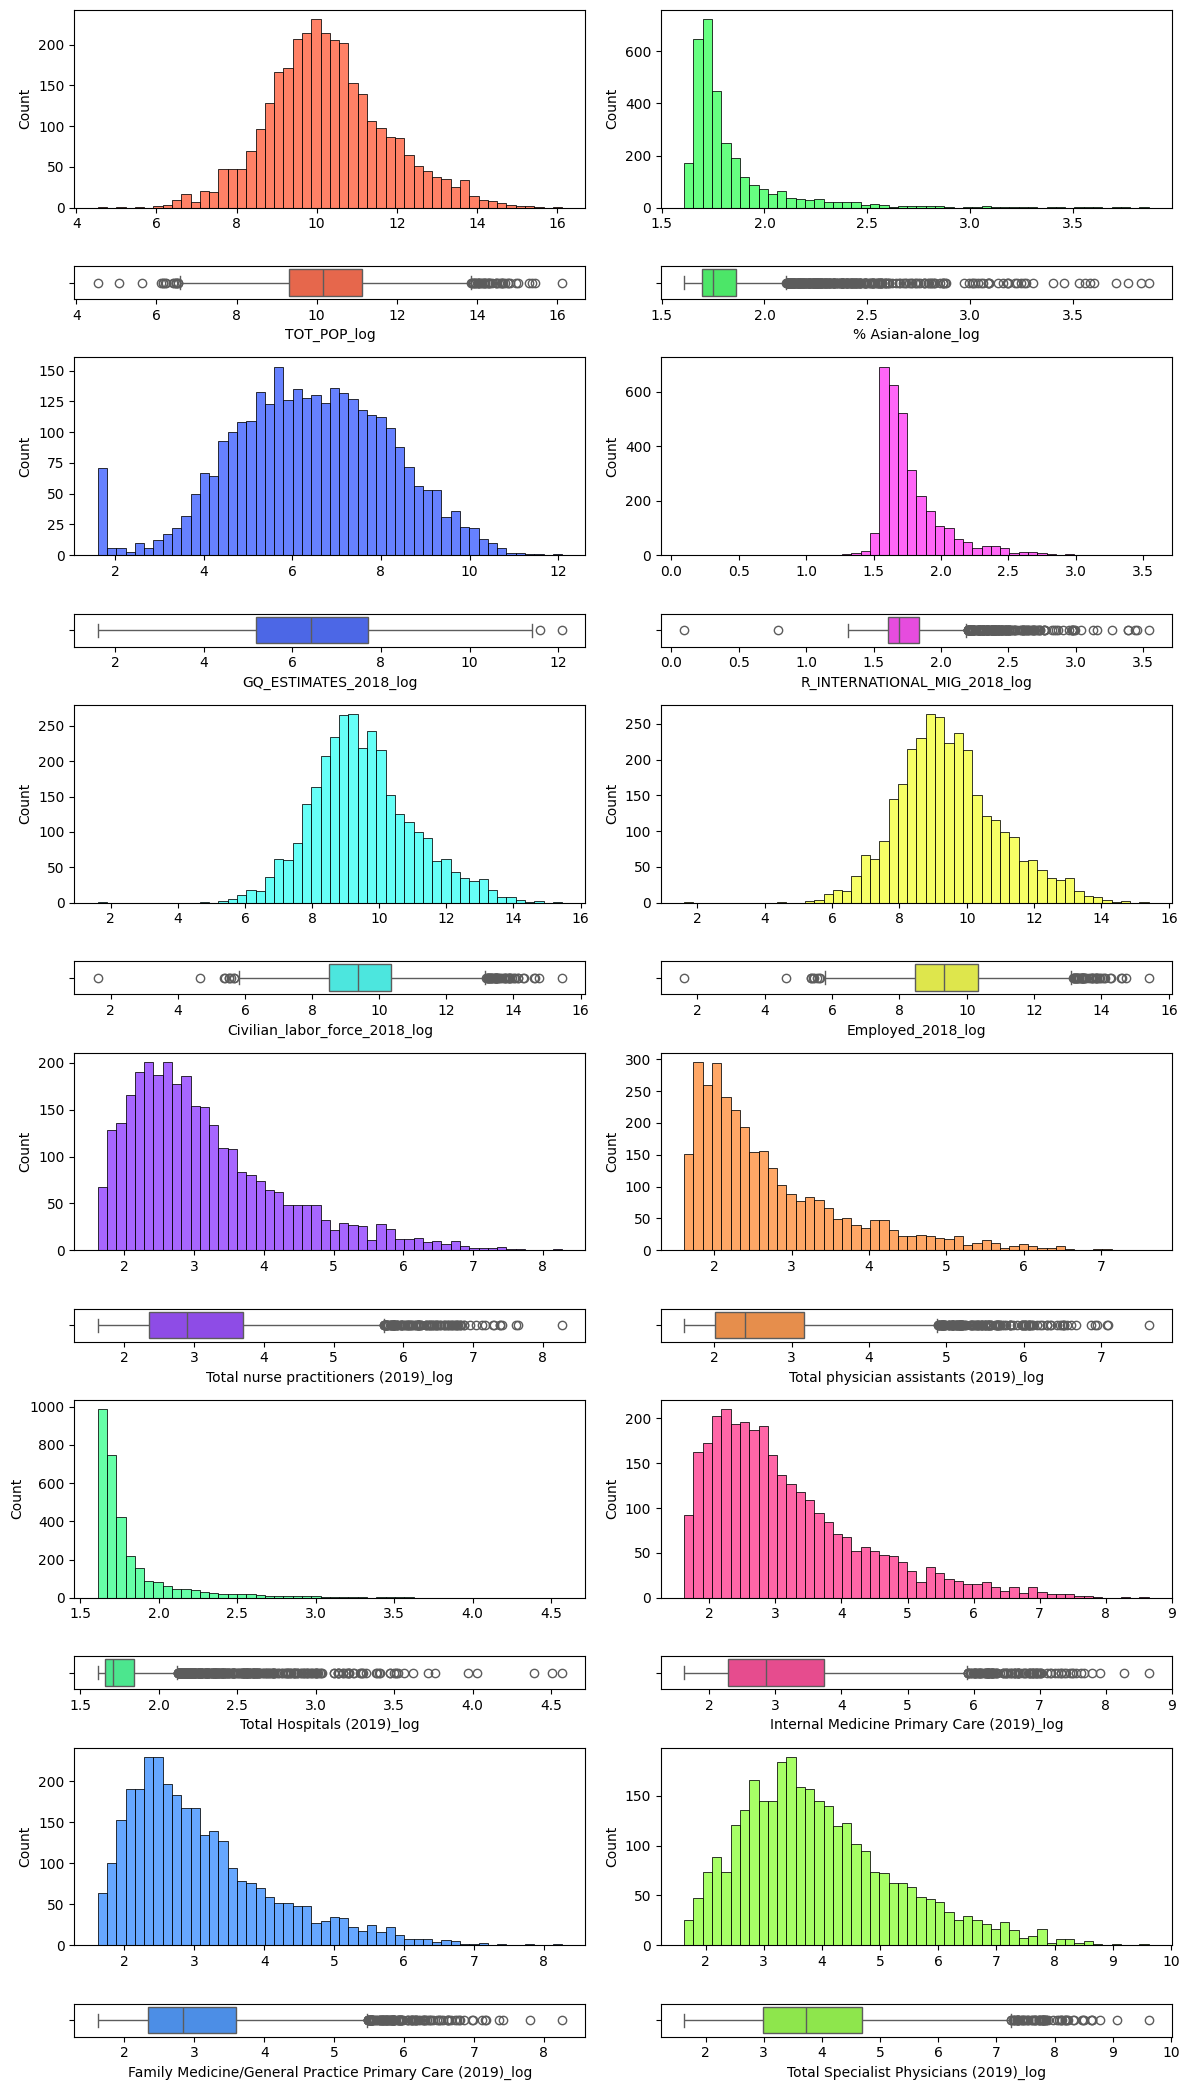

In [28]:
# Graficando el analisis de variables numericas transformadas a logaritmo
# cols_graph = ["TOT_POP_log", "% Asian-alone_log", "GQ_ESTIMATES_2018_log", "R_INTERNATIONAL_MIG_2018_log", "Civilian_labor_force_2018_log", "Employed_2018_log", 
# "Total nurse practitioners (2019)_log", "Total physician assistants (2019)_log", "Total Hospitals (2019)_log", "Internal Medicine Primary Care (2019)_log", 
# "Family Medicine/General Practice Primary Care (2019)_log", "Total Specialist Physicians (2019)_log"]

fig, axis = plt.subplots(12, 2, figsize = (12, 21), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})


# Crear una figura múltiple con histogramas y diagramas de caja
# TOT_POP_log
sns.histplot(ax = axis[0, 0], data = data_log, x = "TOT_POP_log", bins=50, color="#FF5733").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_log, x = "TOT_POP_log", color="#FF5733").set(xlabel = "TOT_POP_log")

# % Asian-alone_log
sns.histplot(ax = axis[0, 1], data = data_log, x = "% Asian-alone_log", bins=50, color="#33FF57").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data_log, x = "% Asian-alone_log", color="#33FF57").set(xlabel = "% Asian-alone_log")

# GQ_ESTIMATES_2018_log
sns.histplot(ax = axis[2, 0], data = data_log, x = "GQ_ESTIMATES_2018_log", bins=50, color="#3357FF").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data_log, x = "GQ_ESTIMATES_2018_log", color="#3357FF").set(xlabel = "GQ_ESTIMATES_2018_log")

# R_INTERNATIONAL_MIG_2018_log
sns.histplot(ax = axis[2, 1], data = data_log, x = "R_INTERNATIONAL_MIG_2018_log", bins=50, color="#FF33F5").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data_log, x = "R_INTERNATIONAL_MIG_2018_log", color="#FF33F5").set(xlabel = "R_INTERNATIONAL_MIG_2018_log")

# Civilian_labor_force_2018_log
sns.histplot(ax = axis[4, 0], data = data_log, x = "Civilian_labor_force_2018_log", bins=50, color="#33FFF5").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data_log, x = "Civilian_labor_force_2018_log", color="#33FFF5").set(xlabel = "Civilian_labor_force_2018_log")

# Employed_2018_log
sns.histplot(ax = axis[4, 1], data = data_log, x = "Employed_2018_log", bins=50, color="#F5FF33").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data_log, x = "Employed_2018_log", color="#F5FF33").set(xlabel = "Employed_2018_log")

# Total nurse practitioners (2019)_log
sns.histplot(ax = axis[6, 0], data = data_log, x = "Total nurse practitioners (2019)_log", bins=50, color="#8A33FF").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data_log, x = "Total nurse practitioners (2019)_log", color="#8A33FF").set(xlabel = "Total nurse practitioners (2019)_log")

# Total physician assistants (2019)_log
sns.histplot(ax = axis[6, 1], data = data_log, x = "Total physician assistants (2019)_log", bins=50, color="#FF8A33").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data_log, x = "Total physician assistants (2019)_log", color="#FF8A33").set(xlabel = "Total physician assistants (2019)_log")

# Total Hospitals (2019)_log
sns.histplot(ax = axis[8, 0], data = data_log, x = "Total Hospitals (2019)_log", bins=50, color="#33FF8A").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data_log, x = "Total Hospitals (2019)_log", color="#33FF8A").set(xlabel = "Total Hospitals (2019)_log")

# Internal Medicine Primary Care (2019)_log
sns.histplot(ax = axis[8, 1], data = data_log, x = "Internal Medicine Primary Care (2019)_log", bins=50, color="#FF338A").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = data_log, x = "Internal Medicine Primary Care (2019)_log", color="#FF338A").set(xlabel = "Internal Medicine Primary Care (2019)_log")

# Family Medicine/General Practice Primary Care (2019)_log
sns.histplot(ax = axis[10, 0], data = data_log, x = "Family Medicine/General Practice Primary Care (2019)_log", bins=50, color="#338AFF").set(xlabel = None)
sns.boxplot(ax = axis[11, 0], data = data_log, x = "Family Medicine/General Practice Primary Care (2019)_log", color="#338AFF").set(xlabel = "Family Medicine/General Practice Primary Care (2019)_log")

# Total Specialist Physicians (2019)_log
sns.histplot(ax = axis[10, 1], data = data_log, x = "Total Specialist Physicians (2019)_log", bins=50, color="#8AFF33").set(xlabel = None)
sns.boxplot(ax = axis[11, 1], data = data_log, x = "Total Specialist Physicians (2019)_log", color="#8AFF33").set(xlabel = "Total Specialist Physicians (2019)_log")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [29]:
# Separacion de datos para escalado y modelo
X = data_log.drop("Heart disease_prevalence", axis = 1)
y = data_log["Heart disease_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Guardar mi informacion en dos archivos .csv para el trabajo desde app.py
# Unir X_train con y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Unir X_test con y_test
test_data = pd.concat([X_test, y_test], axis=1)

# Guardar en archivos CSV
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

In [30]:
# Escalado
# Instancio el escalador
scaler = MinMaxScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,TOT_POP,% Asian-alone,GQ_ESTIMATES_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,GQ_ESTIMATES_2018_log,R_INTERNATIONAL_MIG_2018_log,Civilian_labor_force_2018_log,Employed_2018_log,Total nurse practitioners (2019)_log,Total physician assistants (2019)_log,Total Hospitals (2019)_log,Internal Medicine Primary Care (2019)_log,Family Medicine/General Practice Primary Care (2019)_log,Total Specialist Physicians (2019)_log
1292,0.002626,0.007782,0.001699,0.456621,0.372038,0.161677,0.272727,0.574737,0.252011,0.287037,...,0.393118,0.515575,0.564997,0.562394,0.180829,0.183527,0.024861,0.226103,0.215196,0.306470
2302,0.005064,0.010490,0.007301,0.598174,0.260664,0.116766,0.190275,0.848421,0.235925,0.277778,...,0.531010,0.439432,0.607447,0.605894,0.282511,0.284813,0.049817,0.315877,0.286625,0.386733
761,0.003730,0.024281,0.028161,0.420091,0.376777,0.134731,0.202960,0.751579,0.215818,0.225926,...,0.659525,0.472322,0.586954,0.586201,0.237640,0.111271,0.046811,0.194753,0.233459,0.295561
2194,0.009094,0.034675,0.006819,0.415525,0.374408,0.131737,0.141649,0.520000,0.325737,0.181481,...,0.524517,0.467093,0.657433,0.657271,0.274829,0.324043,0.155020,0.278466,0.366934,0.388516
1241,0.013300,0.069696,0.024258,0.470320,0.381517,0.185629,0.162791,0.595789,0.284182,0.320370,...,0.645308,0.549262,0.681918,0.681164,0.382834,0.401808,0.110470,0.431269,0.426953,0.500487


In [31]:
# Seleccion de mejores parametros para el modelo
selection_model = SelectKBest(mutual_info_regression, k = 5)

# Entreno el modelo de seleccion con los datos de entrenamiento
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()

# Aplico el modelo de seleccion en ambos
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,Median_Household_Income_2018,anycondition_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,0.358835,0.626697,0.475610,0.395833,0.441860
1,0.325975,0.558824,0.390244,0.364583,0.372093
2,0.389779,0.565611,0.347561,0.317708,0.232558
3,0.440576,0.563348,0.280488,0.265625,0.255814
4,0.344866,0.588235,0.371951,0.333333,0.348837


In [32]:
# Con regresion lineal tipica
# Modelo
reg_lin = LinearRegression()

# Entrenamiento
reg_lin.fit(X_train_sel, y_train)

# Predicción
y_pred = reg_lin.predict(X_test_sel)

# Metricas
mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)

print("MSE: ", mse_rl)
print("RMSE: ", rmse_rl)
print("Coeficiente de determinación: ", r2_rl)

MSE:  0.22442477013933618
RMSE:  0.4737349154741881
Coeficiente de determinación:  0.93043708237736


In [33]:
# Calculo de metricas para verificar overfitting
# Predicciones
y_train_pred = reg_lin.predict(X_train_sel)
y_test_pred = reg_lin.predict(X_test_sel)

# Métricas en train
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))

# Métricas en test
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# Conclusion: no esta haciendo overfitting

Train MSE: 0.1993412646654026
Train R²: 0.9347629918257552
Test MSE: 0.22442477013933618
Test R²: 0.93043708237736


In [34]:
# Regularizacion Lasso
# Modelo
reg_lasso = Lasso(alpha = 0.3, max_iter = 1000)

# Entrenamiento
reg_lasso.fit(X_train_sel, y_train)

# Prediccion
y_pred = reg_lasso.predict(X_test_sel)

# Metricas
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  3.2379804850729235
RMSE:  1.7994389361889787
Coeficiente de determinación:  -0.0036475457098577024


In [35]:
# Por el coeficiente de determinacion tan bajo decido hacer cross validation con Lasso para buscar mejor alpha

model = LassoCV(cv=5).fit(X_train_sel, y_train)
print("Mejor alpha:", model.alpha_)

Mejor alpha: 0.00022027955681843208


In [36]:
# Regularizacion Lasso con CV
# Modelo
reg_lasso = Lasso(alpha = model.alpha_, max_iter = 1000)

# Entrenamiento
reg_lasso.fit(X_train_sel, y_train)

# Prediccion
y_pred = reg_lasso.predict(X_test_sel)
y_pred

# Metricas
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  0.22474273849938547
RMSE:  0.47407039403382434
Coeficiente de determinación:  0.9303385245986309


In [37]:
# Calculo de metricas para verificar overfitting
# Predicciones
y_train_pred = reg_lasso.predict(X_train_sel)
y_test_pred = reg_lasso.predict(X_test_sel)

# Métricas en train
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))

# Métricas en test
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# Conclusion: no esta haciendo overfitting

Train MSE: 0.19952491680115414
Train R²: 0.9347028892880225
Test MSE: 0.22474273849938547
Test R²: 0.9303385245986309


In [38]:
# Regularizacion Ridge
# Modelo
reg_ridge = Ridge(alpha = 0.2, max_iter = 4000)

# Entrenamiento
reg_ridge.fit(X_train_sel, y_train)

# Prediccion
y_pred = reg_ridge.predict(X_test_sel)

# Metricas
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred)

print("MSE: ", mse_l2)
print("RMSE: ", rmse_l2)
print("Coeficiente de determinación: ", r2_l2)

MSE:  0.22579580740323835
RMSE:  0.47517976325095995
Coeficiente de determinación:  0.9300121143482641


In [39]:
# Calculo de metricas para verificar overfitting
# Predicciones
y_train_pred = reg_ridge.predict(X_train_sel)
y_test_pred = reg_ridge.predict(X_test_sel)

# Métricas en train
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))

# Métricas en test
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# Conclusion: no esta haciendo overfitting

Train MSE: 0.2002386707701655
Train R²: 0.9344693040662725
Test MSE: 0.22579580740323835
Test R²: 0.9300121143482641


In [40]:
# Comparacion de la aplicacion de los 3 modelos de regresion
# Datos
data = {
    'Modelo': ['Regresión lineal', "Regulación Lasso CV", "Regulación Ridge"],
    'MSE': [mse_rl, mse_l1, mse_l2],
    'RMSE': [rmse_rl, rmse_l1, rmse_l2],
    'R²': [r2_rl, r2_l1, r2_l2]
}

# Crear el DataFrame
resultados = pd.DataFrame(data)

# Mostrar el DataFrame
print(resultados)

                Modelo       MSE      RMSE        R²
0     Regresión lineal  0.224425  0.473735  0.930437
1  Regulación Lasso CV  0.224743  0.474070  0.930339
2     Regulación Ridge  0.225796  0.475180  0.930012


**CONCLUSIONES**

No se obtuvo mejora significativa con la aplicación de los modelos de regularización sobre el de regresión lineal simple, no obstante los 3 son válidos por su alta precisión, por encima del 90% en los 3 casos.